In [1]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

## 1. Load the Dataset

In [2]:
#load the dataset
df = pd.read_excel('Coldplay Research Project_Data.xlsx')

#inspect the first rows
df.head()

#  Album Number   Album Name  Album Release Date  Track Number  \
0  1             1  Parachutes                 2000             1   
1  2             1  Parachutes                 2000             2   
2  3             1  Parachutes                 2000             3   
3  4             1  Parachutes                 2000             4   
4  5             1  Parachutes                 2000             5   

    Track Name                                             Lyrics  
0  Don't Panic  Bones, sinking like stones\nAll that we fought...  
1       Shiver  So I look in your direction\nBut you pay me no...  
2        Spies  I awake to find no peace of mind\nI said, "How...  
3       Sparks  Did I drive you away?\nI know what you'll say\...  
4       Yellow  Look at the stars\nLook how they shine for you...

In [3]:
#get info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   106 non-null    int64 
 1   Album Number        106 non-null    int64 
 2   Album Name          106 non-null    object
 3   Album Release Date  106 non-null    int64 
 4   Track Number        106 non-null    int64 
 5   Track Name          106 non-null    object
 6   Lyrics              106 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.9+ KB


In [4]:
#get a list of all albums
df["Album Name"].unique()

array(['Parachutes ', 'A Rush of Blood to the Head', 'X&Y',
       'Viva la Vida or Death and All His Friends', 'Mylo Xyloto',
       'Ghost Stories', 'A Head Full of Dreams', 'Everyday Life',
       'Music of the Spheres'], dtype=object)

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
missing_values


#                     0
Album Number          0
Album Name            0
Album Release Date    0
Track Number          0
Track Name            0
Lyrics                0
dtype: int64

## 2. Clean, Tokenize, Preprocess lyrics

In [6]:
# Function to clean the lyrics text
def clean_lyrics(text):
    text = re.sub(r'\n', ' ', text)  # Replace new lines with spaces
    text = re.sub(r'[^A-Za-z0-9\s]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the Lyrics column
df['Cleaned Lyrics'] = df['Lyrics'].apply(clean_lyrics)

# Display the cleaned DataFrame
df.head()


#  Album Number   Album Name  Album Release Date  Track Number  \
0  1             1  Parachutes                 2000             1   
1  2             1  Parachutes                 2000             2   
2  3             1  Parachutes                 2000             3   
3  4             1  Parachutes                 2000             4   
4  5             1  Parachutes                 2000             5   

    Track Name                                             Lyrics  \
0  Don't Panic  Bones, sinking like stones\nAll that we fought...   
1       Shiver  So I look in your direction\nBut you pay me no...   
2        Spies  I awake to find no peace of mind\nI said, "How...   
3       Sparks  Did I drive you away?\nI know what you'll say\...   
4       Yellow  Look at the stars\nLook how they shine for you...   

                                      Cleaned Lyrics  
0  bones  sinking like stones all that we fought ...  
1  so i look in your direction but you pay me no ...  
2  i awake to find no peace of mind i said   how ...  
3  did i drive you away  i know what you ll say y...  
4  look at the stars look how they shine for you ...

In [7]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#additional stop words must be included:

additional_stopwards = ["oh", "ooh", "woo", "ol", "la", "hmm", "ah", "na", "para", "hoo"]

In [9]:
# Tokenization, stop words removal, and lemmatization.
stop_words = set(stopwords.words('english')).union(set(additional_stopwards))
lemmatizer = WordNetLemmatizer()

def create_token_list(text):
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return tokens

df['Tokens'] = df['Cleaned Lyrics'].apply(create_token_list)


# Display the dataframe with tokens
df.head()

#  Album Number   Album Name  Album Release Date  Track Number  \
0  1             1  Parachutes                 2000             1   
1  2             1  Parachutes                 2000             2   
2  3             1  Parachutes                 2000             3   
3  4             1  Parachutes                 2000             4   
4  5             1  Parachutes                 2000             5   

    Track Name                                             Lyrics  \
0  Don't Panic  Bones, sinking like stones\nAll that we fought...   
1       Shiver  So I look in your direction\nBut you pay me no...   
2        Spies  I awake to find no peace of mind\nI said, "How...   
3       Sparks  Did I drive you away?\nI know what you'll say\...   
4       Yellow  Look at the stars\nLook how they shine for you...   

                                      Cleaned Lyrics  \
0  bones  sinking like stones all that we fought ...   
1  so i look in your direction but you pay me no ...   
2  i awake to find no peace of mind i said   how ...   
3  did i drive you away  i know what you ll say y...   
4  look at the stars look how they shine for you ...   

                                              Tokens  
0  [bone, sinking, like, stone, fought, home, pla...  
1  [look, direction, pay, attention, know, listen...  
2  [awake, find, peace, mind, said, live, fugitiv...  
3  [drive, away, know, say, say, sing, one, know,...  
4  [look, star, look, shine, everything, yeah, ye...

In [10]:
def preprocess_lyrics(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

# Apply preprocessing to the cleaned lyrics
df['Processed Lyrics'] = df['Cleaned Lyrics'].apply(preprocess_lyrics)

In [11]:
df.head()

#  Album Number   Album Name  Album Release Date  Track Number  \
0  1             1  Parachutes                 2000             1   
1  2             1  Parachutes                 2000             2   
2  3             1  Parachutes                 2000             3   
3  4             1  Parachutes                 2000             4   
4  5             1  Parachutes                 2000             5   

    Track Name                                             Lyrics  \
0  Don't Panic  Bones, sinking like stones\nAll that we fought...   
1       Shiver  So I look in your direction\nBut you pay me no...   
2        Spies  I awake to find no peace of mind\nI said, "How...   
3       Sparks  Did I drive you away?\nI know what you'll say\...   
4       Yellow  Look at the stars\nLook how they shine for you...   

                                      Cleaned Lyrics  \
0  bones  sinking like stones all that we fought ...   
1  so i look in your direction but you pay me no ...   
2  i awake to find no peace of mind i said   how ...   
3  did i drive you away  i know what you ll say y...   
4  look at the stars look how they shine for you ...   

                                              Tokens  \
0  [bone, sinking, like, stone, fought, home, pla...   
1  [look, direction, pay, attention, know, listen...   
2  [awake, find, peace, mind, said, live, fugitiv...   
3  [drive, away, know, say, say, sing, one, know,...   
4  [look, star, look, shine, everything, yeah, ye...   

                                    Processed Lyrics  
0  bone sinking like stone fought home place grow...  
1  look direction pay attention know listen cause...  
2  awake find peace mind said live fugitive see c...  
3  drive away know say say sing one know promise ...  
4  look star look shine everything yeah yellow ca...

## 3. Exploratory Data Analysis

### 3.0 Descriptive Statistics

In [12]:
# Calculate basic statistics
num_albums = df['Album Name'].nunique()
num_tracks = df['Track Name'].nunique()
total_lyrics_length = df['Cleaned Lyrics'].str.len().sum()

# Calculate word count and unique word count for each song
df['Word Count'] = df['Tokens'].apply(len)
df['Unique Word Count'] = df['Tokens'].apply(lambda x: len(set(x)))

# Identify the most common words in the entire dataset
all_tokens = [token for tokens in df['Tokens'] for token in tokens]
common_words = Counter(all_tokens).most_common(20)

In [13]:
# Display the results
basic_stats = {
    "Number of Albums": num_albums,
    "Number of Tracks": num_tracks,
    "Total Length of Lyrics": total_lyrics_length,
}

# Show results
basic_stats, df[['Track Name', 'Word Count', 'Unique Word Count']].head(), common_words

({'Number of Albums': 9,
  'Number of Tracks': 106,
  'Total Length of Lyrics': 94627},
     Track Name  Word Count  Unique Word Count
 0  Don't Panic          54                 22
 1       Shiver         113                 42
 2        Spies          92                 37
 3       Sparks          42                 20
 4       Yellow          74                 30,
 [('know', 172),
  ('go', 124),
  ('love', 110),
  ('get', 107),
  ('yeah', 106),
  ('come', 101),
  ('got', 93),
  ('say', 77),
  ('want', 77),
  ('world', 76),
  ('see', 74),
  ('let', 73),
  ('gon', 64),
  ('light', 64),
  ('cause', 62),
  ('feel', 61),
  ('never', 59),
  ('heart', 57),
  ('could', 57),
  ('one', 55)])

In [14]:
# Function to get most common words for a specific album
def get_common_words_by_album(df, album_name):
    album_tokens = [token for tokens in df[df['Album Name'] == album_name]['Tokens'] for token in tokens]
    return Counter(album_tokens).most_common(20)

# Get a list of unique albums
albums = df['Album Name'].unique()

# Get most common words for each album
common_words_by_album = {album: get_common_words_by_album(df, album) for album in albums}

common_words_by_album

{'Parachutes ': [('yeah', 45),
  ('live', 18),
  ('know', 18),
  ('never', 18),
  ('want', 15),
  ('always', 15),
  ('spy', 15),
  ('look', 14),
  ('cause', 13),
  ('lost', 13),
  ('see', 11),
  ('everything', 11),
  ('life', 11),
  ('come', 11),
  ('sing', 10),
  ('thing', 10),
  ('waiting', 9),
  ('beautiful', 8),
  ('say', 8),
  ('shine', 8)],
 'A Rush of Blood to the Head': [('whisper', 32),
  ('go', 24),
  ('daylight', 24),
  ('breaking', 22),
  ('slowly', 21),
  ('yeah', 20),
  ('come', 19),
  ('give', 18),
  ('back', 18),
  ('eye', 14),
  ('mine', 14),
  ('tell', 13),
  ('open', 13),
  ('upon', 13),
  ('good', 13),
  ('said', 13),
  ('place', 12),
  ('gon', 12),
  ('know', 11),
  ('start', 10)],
 'X&Y': [('go', 25),
  ('see', 25),
  ('feel', 22),
  ('could', 21),
  ('say', 19),
  ('know', 18),
  ('get', 17),
  ('never', 16),
  ('come', 15),
  ('part', 15),
  ('right', 14),
  ('love', 13),
  ('belong', 12),
  ('want', 11),
  ('try', 11),
  ('wait', 11),
  ('wan', 10),
  ('somethi

### 3.1 EDA Visuals

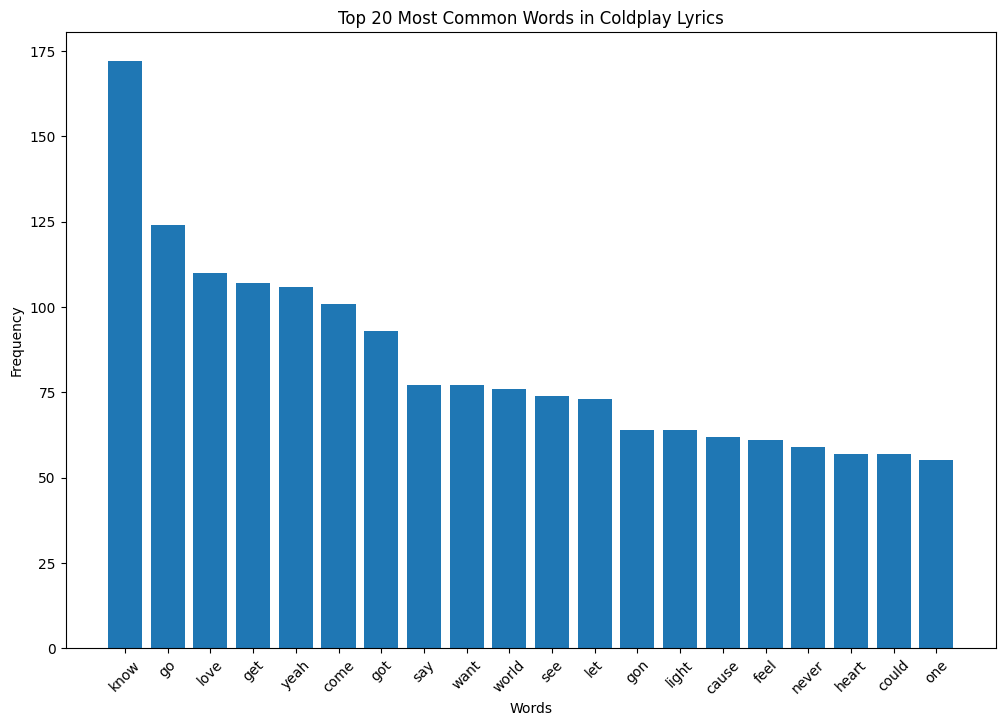

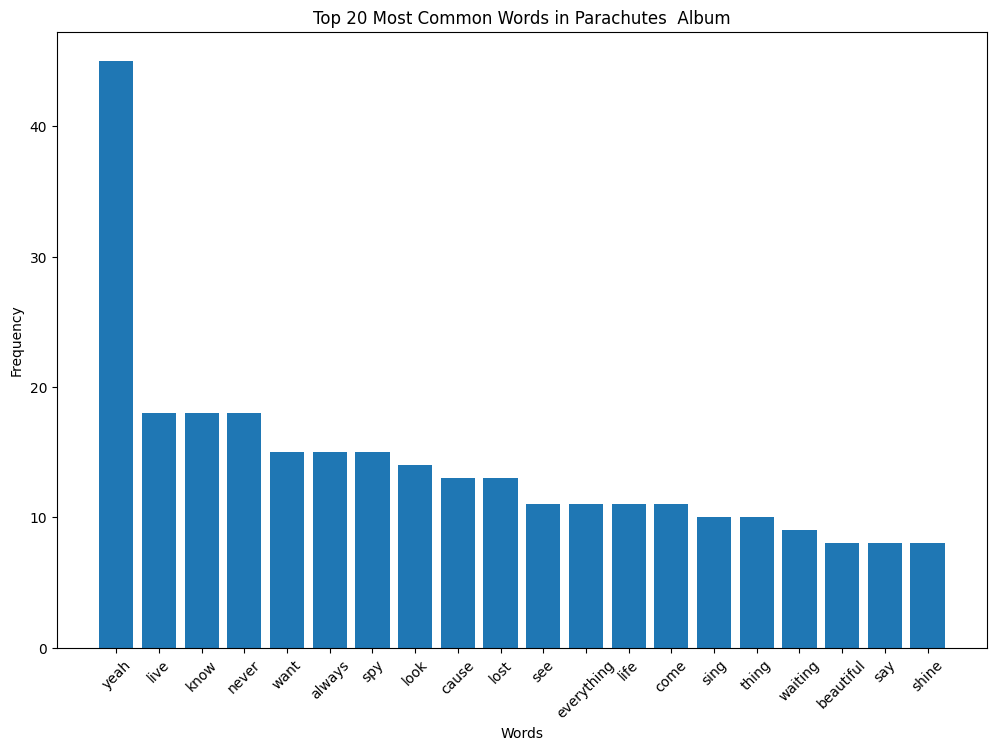

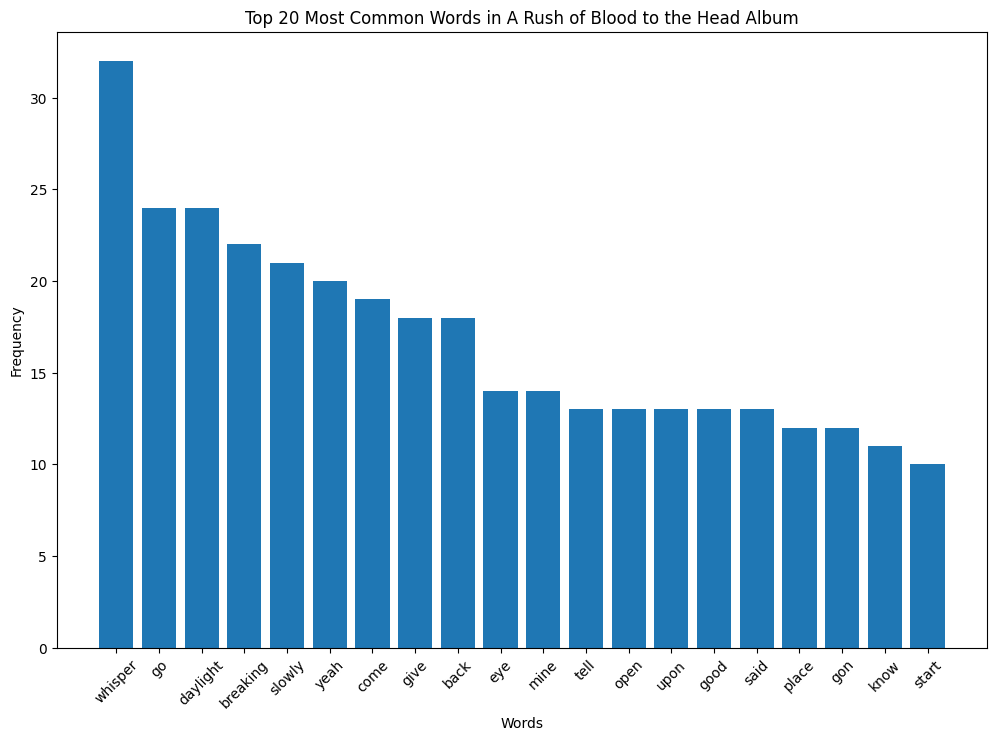

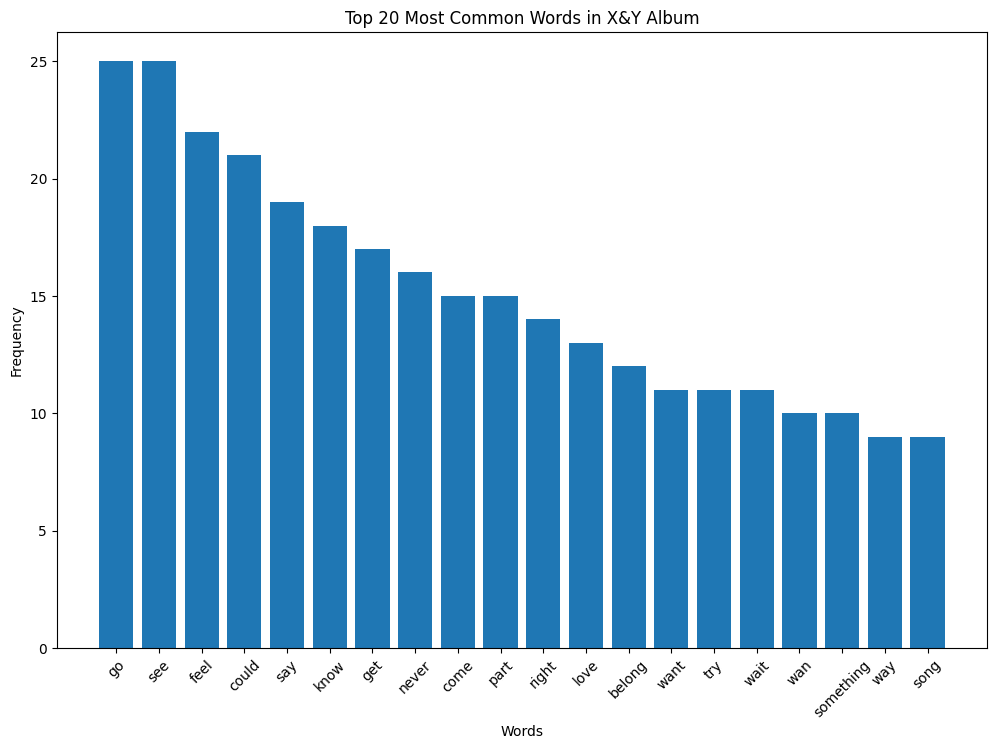

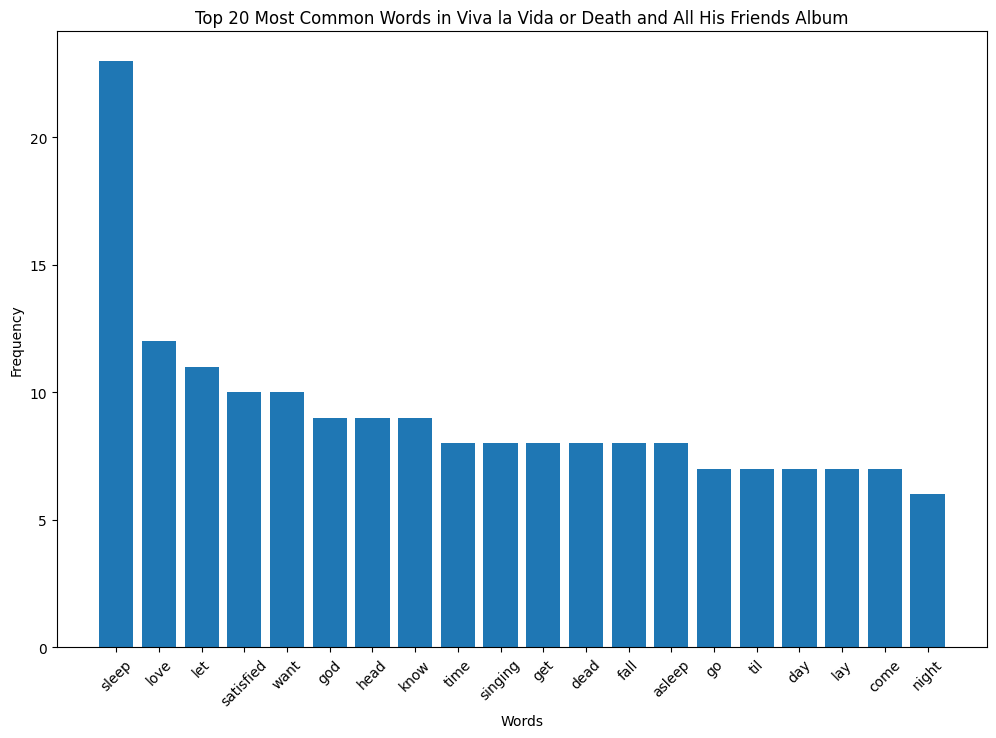

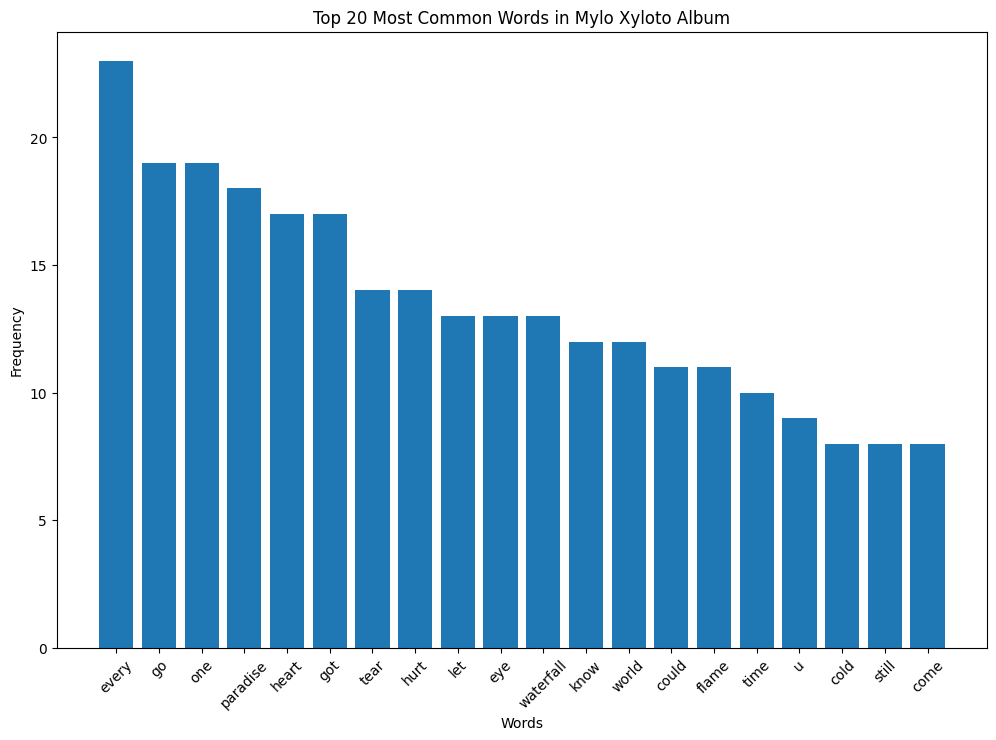

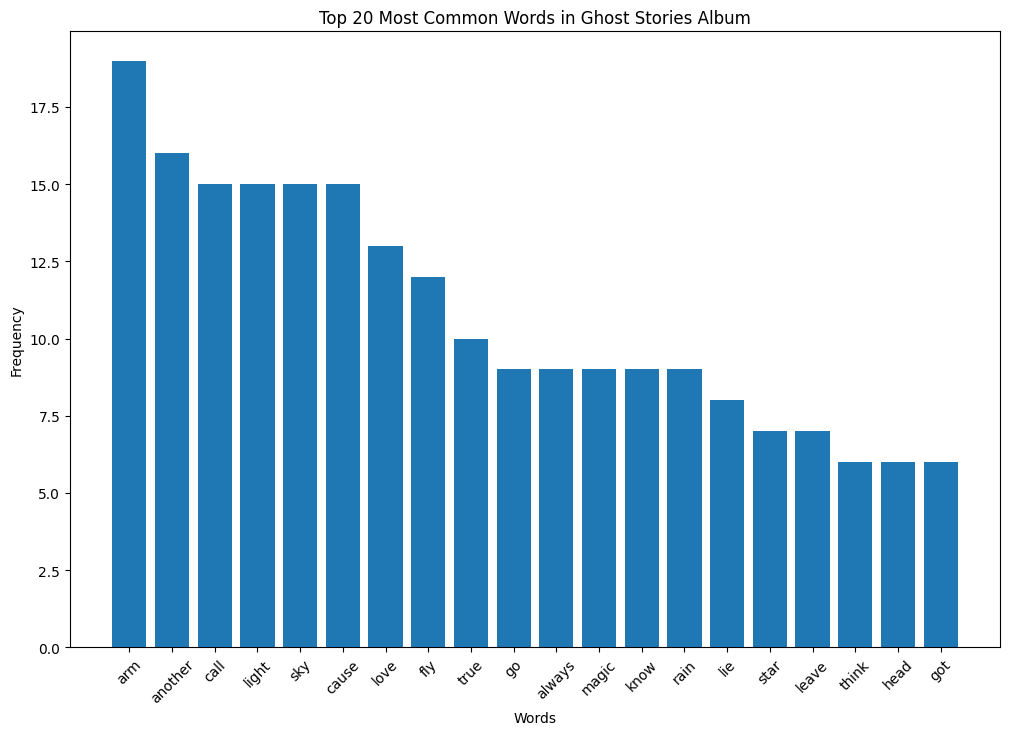

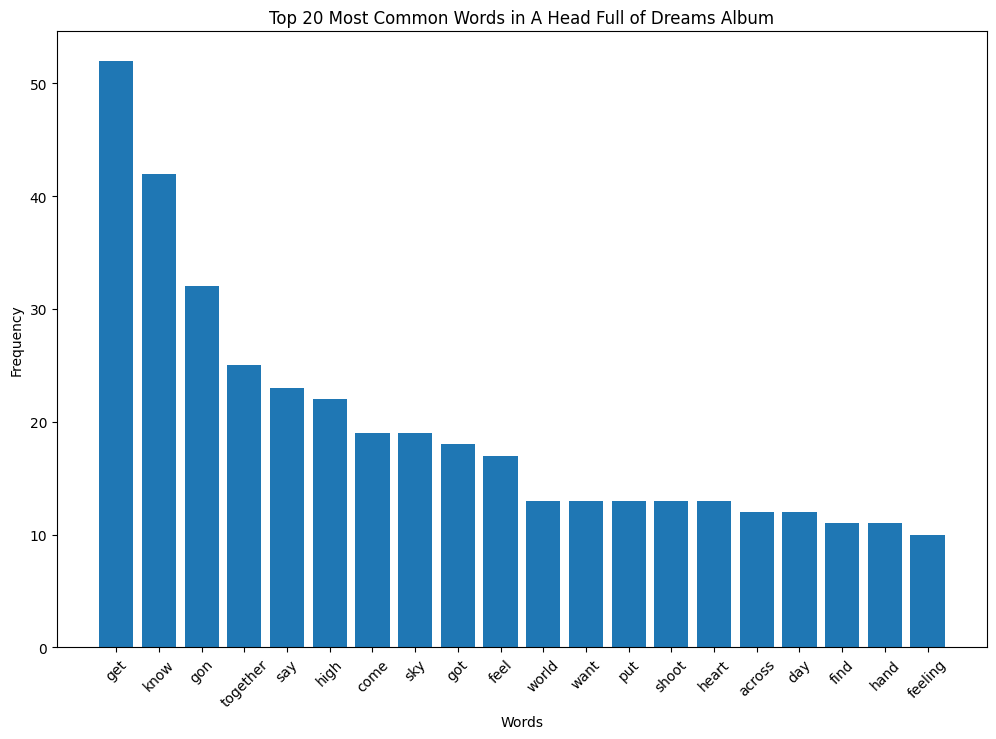

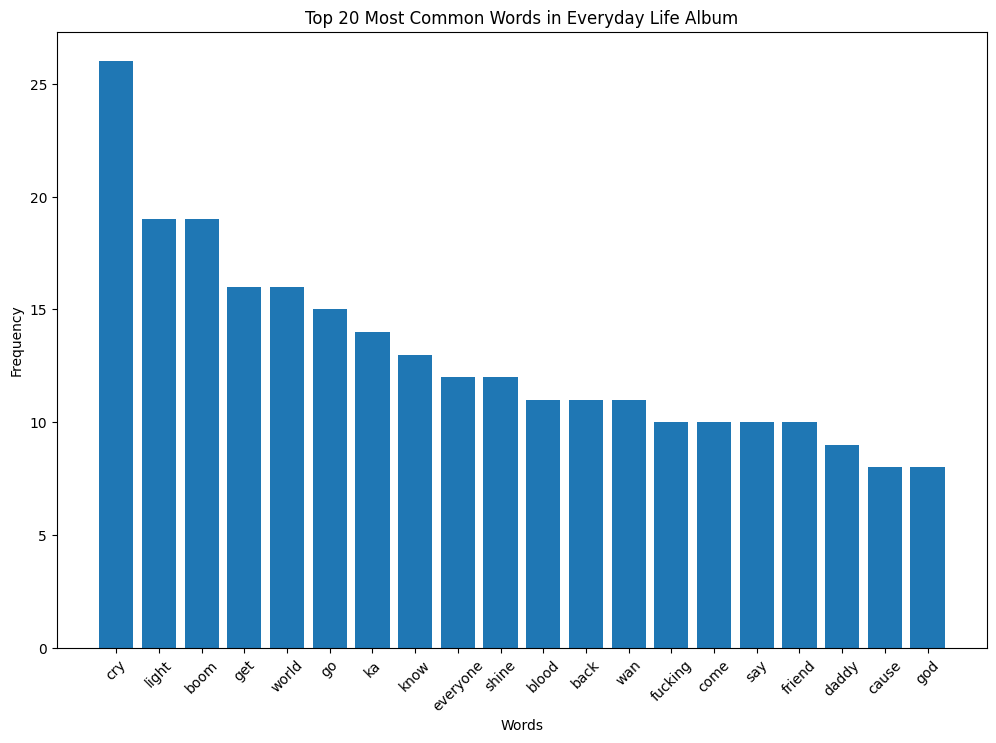

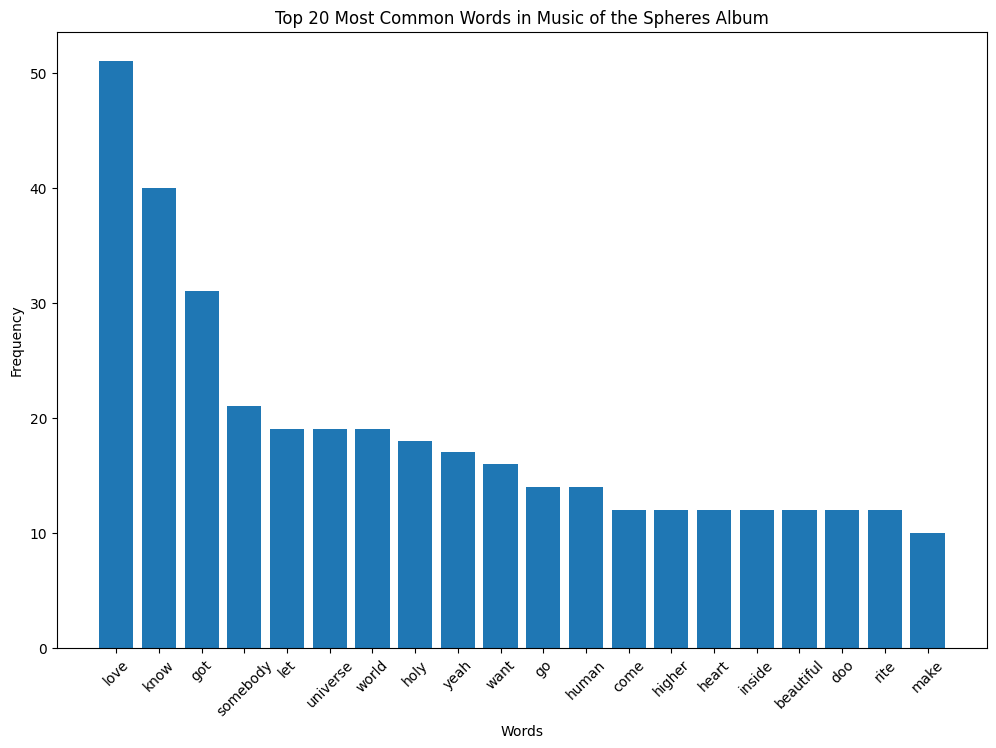

In [15]:
# Function to plot word frequency distribution
def plot_word_frequency(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot overall word frequency distribution
plot_word_frequency(common_words, 'Top 20 Most Common Words in Coldplay Lyrics')

# Plot word frequency distribution for each album
for album, word_counts in common_words_by_album.items():
    plot_word_frequency(word_counts, f'Top 20 Most Common Words in {album} Album')

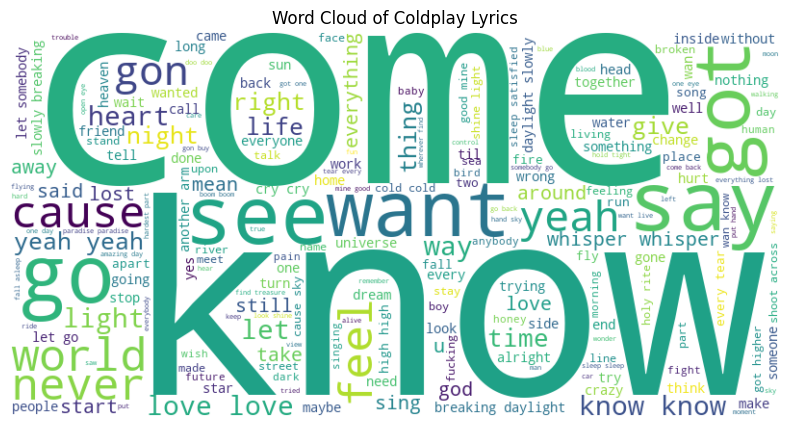

In [16]:
# Combine all tokens into a single string
all_tokens_str = ' '.join([token for tokens in df['Tokens'] for token in tokens])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_str)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Coldplay Lyrics')
plt.show()

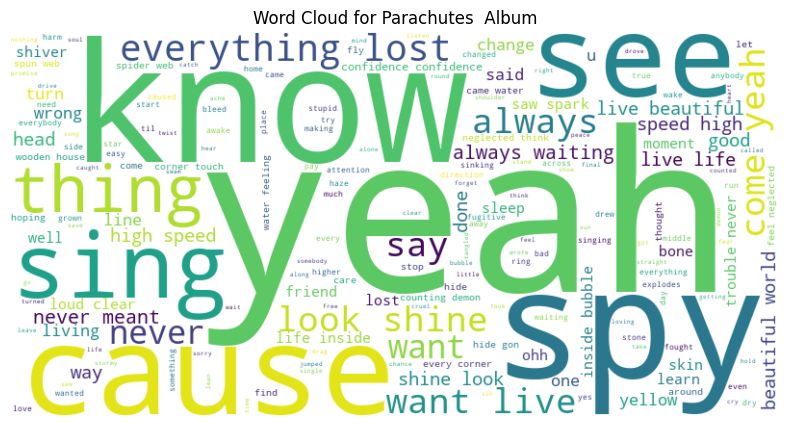

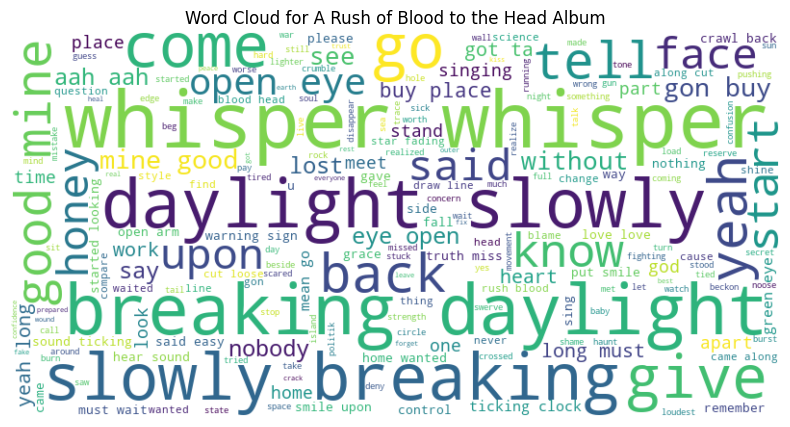

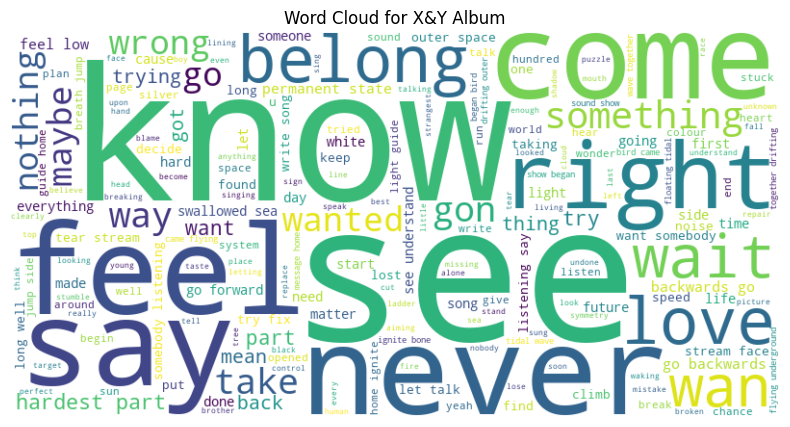

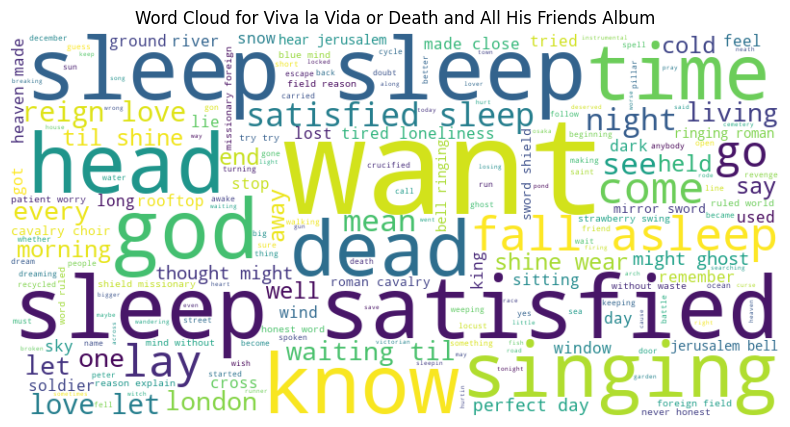

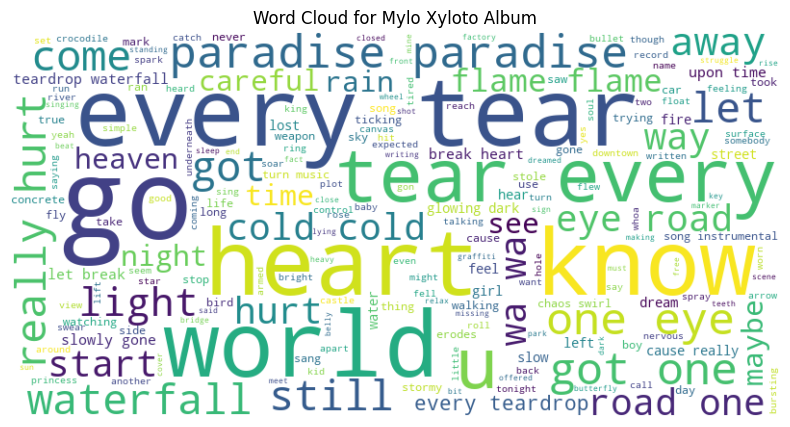

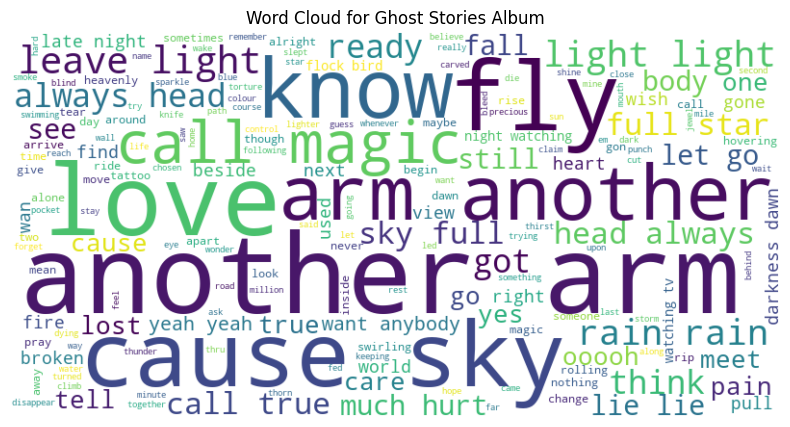

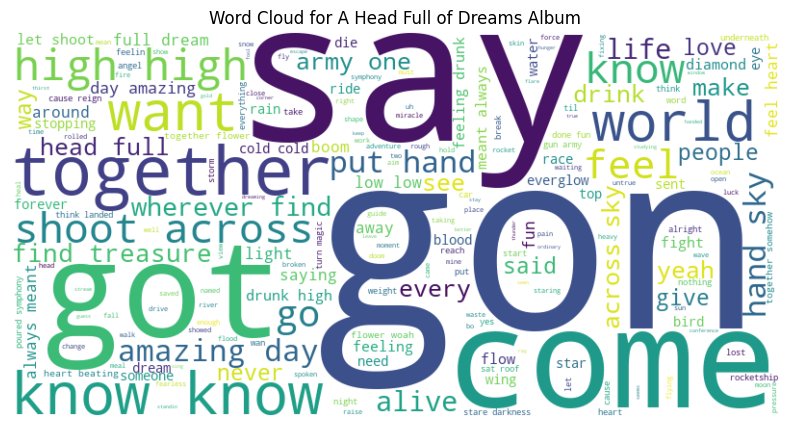

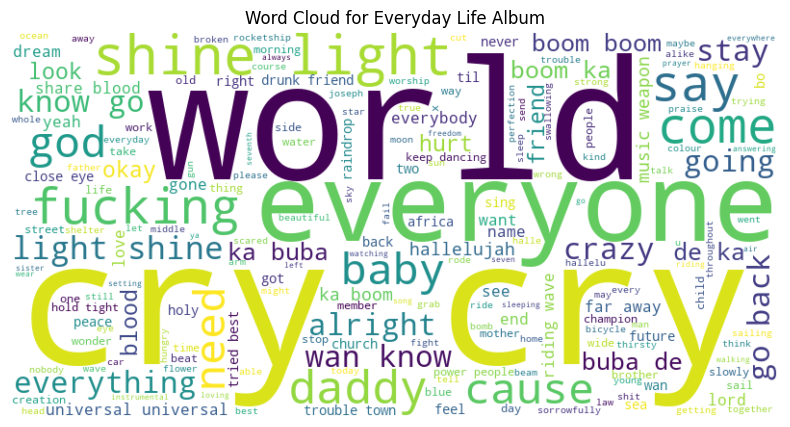

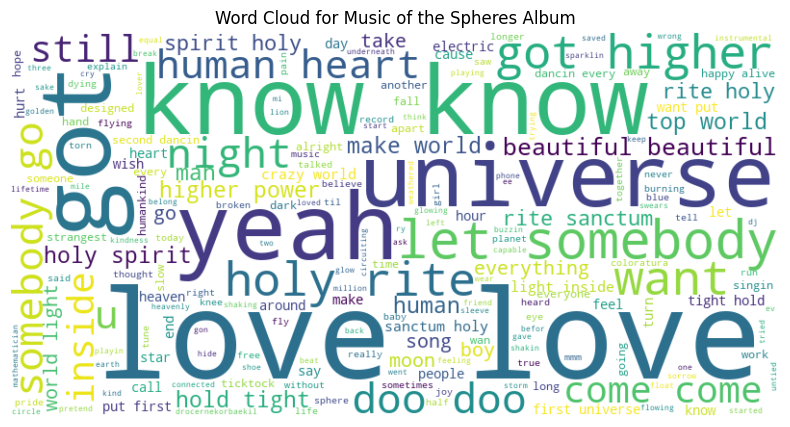

In [17]:
# Function to generate word cloud for each album
def generate_wordcloud(tokens, title):
    tokens_str = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_str)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each album
for album in df['Album Name'].unique():
    album_tokens = [token for tokens in df[df['Album Name'] == album]['Tokens'] for token in tokens]
    generate_wordcloud(album_tokens, f'Word Cloud for {album} Album')


## 4. Text Analysis

### 4.1 Sentiment Analysis

In [18]:
from textblob import TextBlob

In [19]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned lyrics
df['Sentiment'] = df['Cleaned Lyrics'].apply(get_sentiment)

# Display the dataframe with sentiment
print(df[['Track Name', 'Sentiment']].head())

    Track Name  Sentiment
0  Don't Panic   0.493182
1       Shiver   0.200000
2        Spies   0.004733
3       Sparks  -0.327778
4       Yellow   0.243056


In [20]:
# Summary statistics for sentiment
sentiment_summary = df['Sentiment'].describe()
print(sentiment_summary)

count    106.000000
mean       0.090530
std        0.187620
min       -0.334821
25%       -0.002983
50%        0.069048
75%        0.218905
max        0.561111
Name: Sentiment, dtype: float64


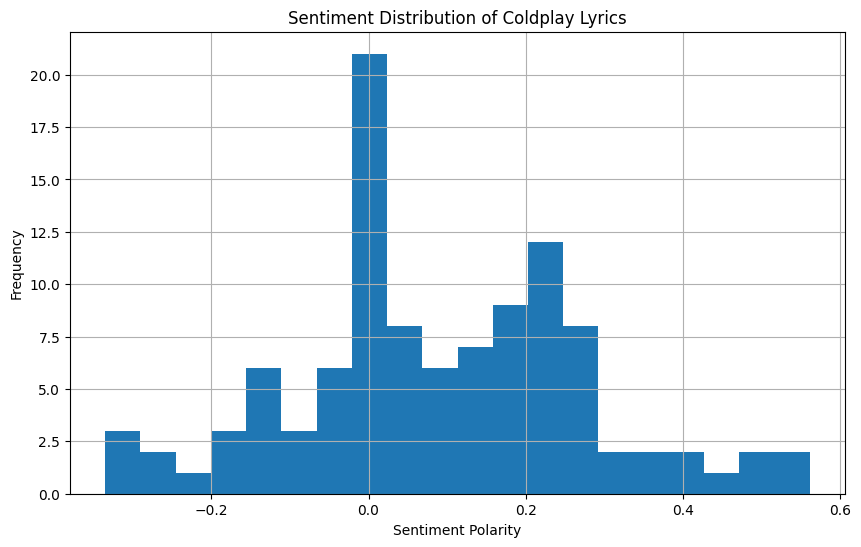

In [21]:

plt.figure(figsize=(10, 6))
df['Sentiment'].hist(bins=20)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Coldplay Lyrics')
plt.show()

Sentiment per Album

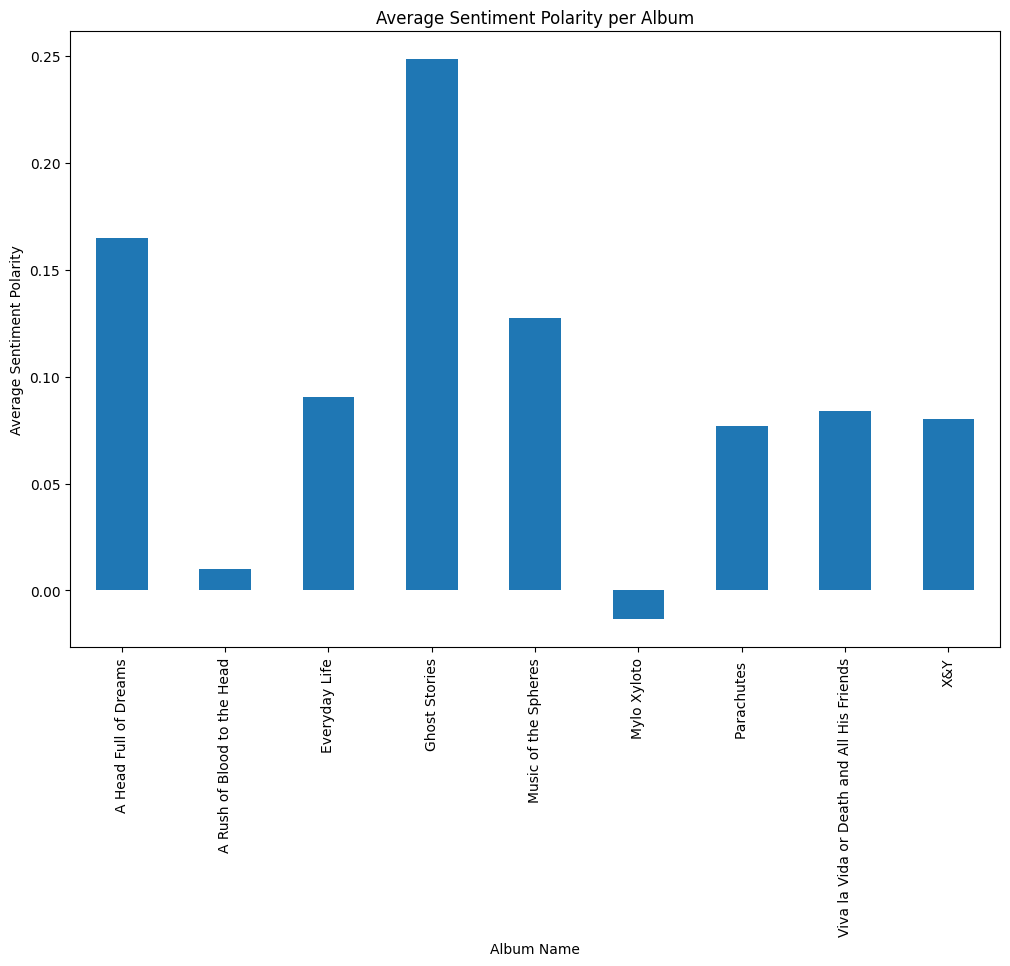

In [22]:
# Sentiment Distribution per Album
plt.figure(figsize=(12, 8))
df.groupby('Album Name')['Sentiment'].mean().plot(kind='bar')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Polarity per Album')
plt.show()

Sentiment Over time

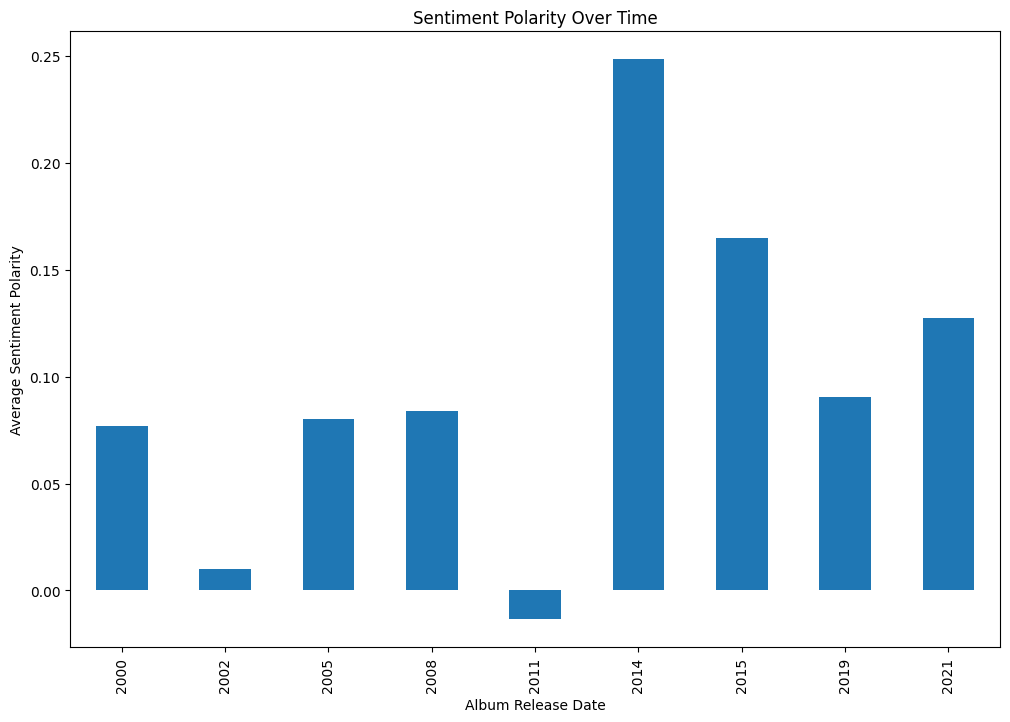

In [23]:

# Sentiment Over Time
plt.figure(figsize=(12, 8))
df.groupby(df['Album Release Date'])['Sentiment'].mean().plot(kind='bar')
plt.ylabel('Average Sentiment Polarity')
plt.title('Sentiment Polarity Over Time')
plt.show()



Rolling Window Sentiment --> REQUIRES WORK

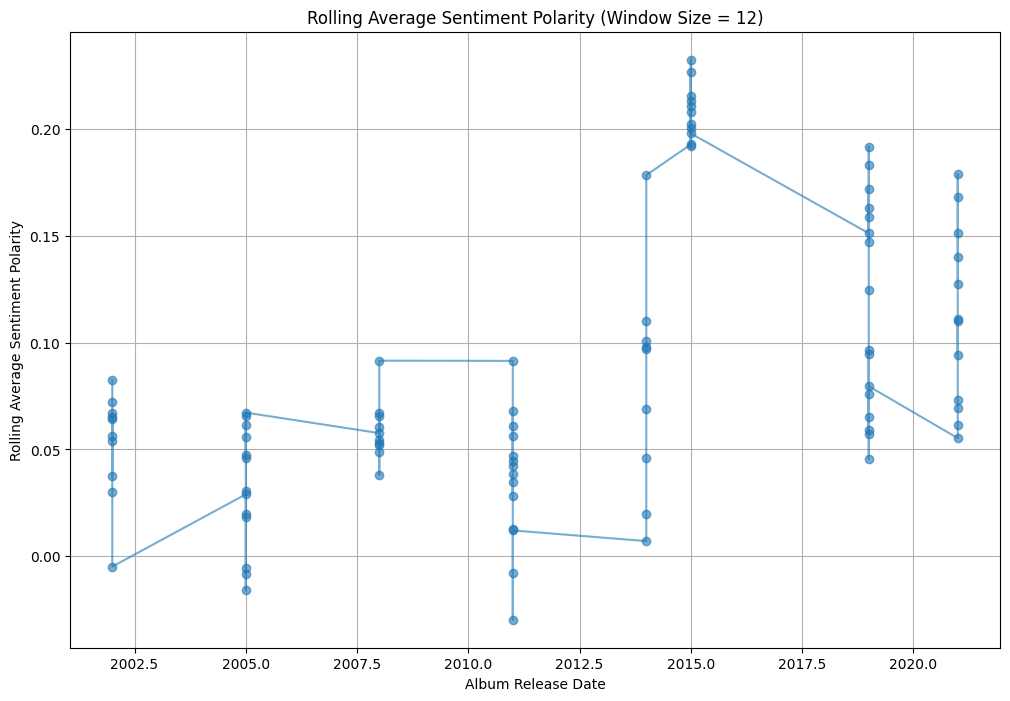

In [24]:
# Rolling Average Sentiment Over Time
window_size = 12  # You can adjust the window size
df['Rolling Sentiment'] = df['Sentiment'].rolling(window=window_size).mean()

# Plot rolling average sentiment using Matplotlib
plt.figure(figsize=(12, 8))
plt.plot(df['Album Release Date'], df['Rolling Sentiment'], marker='o', alpha=0.6)
plt.xlabel('Album Release Date')
plt.ylabel('Rolling Average Sentiment Polarity')
plt.title(f'Rolling Average Sentiment Polarity (Window Size = {window_size})')
plt.grid(True)
plt.show()

Sentiment vs WordCount

            Sentiment  Word Count
Sentiment    1.000000    0.070564
Word Count   0.070564    1.000000


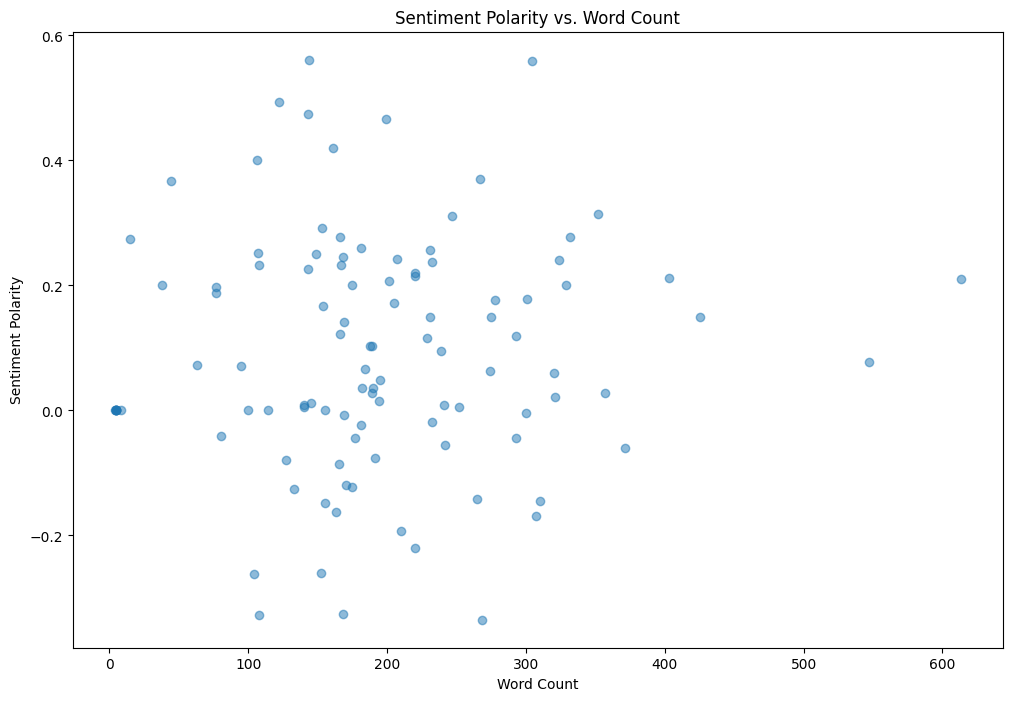

In [25]:
# Calculate word count
df['Word Count'] = df['Cleaned Lyrics'].apply(lambda x: len(x.split()))

# Correlation between Sentiment and Word Count
correlation = df[['Sentiment', 'Word Count']].corr()
print(correlation)

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['Word Count'], df['Sentiment'], alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity vs. Word Count')
plt.show()


Top Positive and Negative Songs

In [26]:
# Top 10 Positive Songs
top_positive_songs = df.nlargest(10, 'Sentiment')[['Track Name', 'Album Name', 'Sentiment']]
print("Top 10 Positive Songs:")
print(top_positive_songs)

# Top 10 Negative Songs
top_negative_songs = df.nsmallest(10, 'Sentiment')[['Track Name', 'Album Name', 'Sentiment']]
print("Top 10 Negative Songs:")
print(top_negative_songs)


Top 10 Positive Songs:
                         Track Name                   Album Name  Sentiment
66                                O                Ghost Stories   0.561111
101                        Biutyful         Music of the Spheres   0.559322
0                       Don't Panic                  Parachutes    0.493182
75                      Amazing Day        A Head Full of Dreams   0.475000
92            Champion of the World                Everyday Life   0.466209
79                           Church                Everyday Life   0.420000
62                         Midnight                Ghost Stories   0.400000
12   God Put a Smile upon Your Face  A Rush of Blood to the Head   0.369697
73                     Kaleidoscope        A Head Full of Dreams   0.367273
103          My Universe (with BTS)         Music of the Spheres   0.314773
Top 10 Negative Songs:
                                           Track Name  \
45                                  Hurts Like Heaven   
3   

Sentiment Distribution per Album (Boxplots)

<Figure size 1500x1000 with 0 Axes>

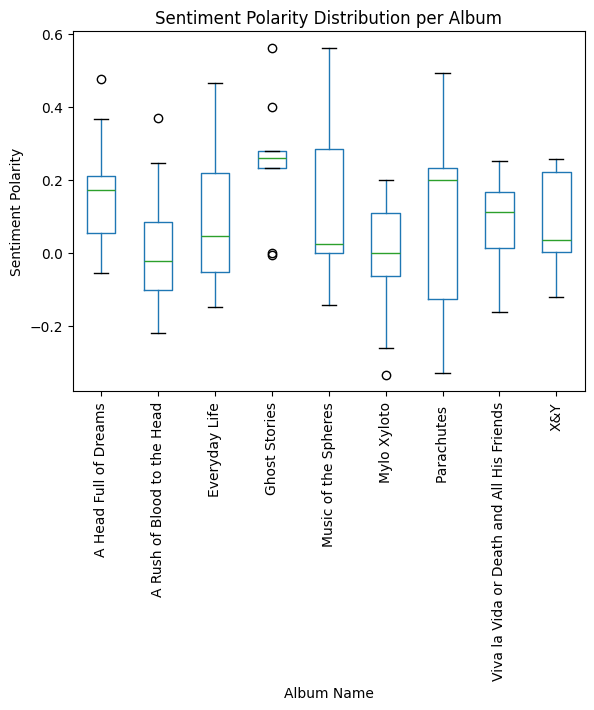

In [27]:
# Box Plot of Sentiment per Album
plt.figure(figsize=(15, 10))
df.boxplot(column='Sentiment', by='Album Name', grid=False, rot=90)
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity Distribution per Album')
plt.suptitle('')
plt.show()


### 4.2 N-gram Analysis: Analyze the most common bi-grams or tri-grams (pairs of triplets of words)

In [28]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to remove specified words from the text
def remove_words(text, words_to_exclude):
    pattern = r'\b(' + '|'.join(re.escape(word) for word in words_to_exclude) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2), words_to_exclude=[]):
    # Remove specified words from each document in the corpus
    cleaned_corpus = [remove_words(doc, words_to_exclude) for doc in corpus]
    
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(cleaned_corpus)
    bag_of_words = vectorizer.transform(cleaned_corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example list of words to exclude
words_to_exclude = list(stop_words) 

# Get top 20 bi-grams excluding specified words
top_bigrams = get_top_ngrams(df['Cleaned Lyrics'], n=20, ngram_range=(2, 2), words_to_exclude=words_to_exclude)

# Get top 20 tri-grams excluding specified words
top_trigrams = get_top_ngrams(df['Cleaned Lyrics'], n=20, ngram_range=(3, 3), words_to_exclude=words_to_exclude)

# Display the top bi-grams and tri-grams
print("Top 20 Bi-grams:", top_bigrams)
print("Top 20 Tri-grams:", top_trigrams)


Top 20 Bi-grams: [('love love', 39), ('know know', 37), ('yeah yeah', 30), ('whisper whisper', 28), ('gonna get', 25), ('get get', 25), ('get together', 24), ('breaking daylight', 22), ('daylight slowly', 21), ('slowly breaking', 21), ('let go', 20), ('cry cry', 18), ('another arms', 16), ('let somebody', 15), ('every tear', 13), ('high high', 13), ('good mine', 12), ('feel like', 12), ('cold cold', 12), ('shoot across', 12)]
Top 20 Tri-grams: [('love love love', 32), ('whisper whisper whisper', 24), ('gonna get get', 24), ('get get together', 24), ('daylight slowly breaking', 21), ('slowly breaking daylight', 21), ('breaking daylight slowly', 20), ('know know know', 19), ('cry cry cry', 12), ('every tear every', 10), ('put hands sky', 10), ('yeah yeah yeah', 9), ('good mine good', 9), ('mine good mine', 9), ('got one eye', 9), ('wherever find treasure', 9), ('let somebody go', 9), ('sleep sleep sleep', 8), ('another arms another', 8), ('arms another arms', 8)]


In [29]:
# Function to get top bigrams and trigrams for each album
def get_top_ngrams_per_album(df, album_name, n=20, words_to_exclude=[]):
    album_lyrics = df[df['Album Name'] == album_name]['Cleaned Lyrics']
    top_bigrams = get_top_ngrams(album_lyrics, n=n, ngram_range=(2, 2), words_to_exclude=words_to_exclude)
    top_trigrams = get_top_ngrams(album_lyrics, n=n, ngram_range=(3, 3), words_to_exclude=words_to_exclude)
    return top_bigrams, top_trigrams

# Get a list of unique albums
albums = df['Album Name'].unique()

# Get top bigrams and trigrams for each album
ngrams_per_album = {album: get_top_ngrams_per_album(df, album, words_to_exclude= words_to_exclude) for album in albums}

# Display the results
for album, (bigrams, trigrams) in ngrams_per_album.items():
    print(f"Album: {album}")
    print("Top 20 Bigrams:", bigrams)
    print("Top 20 Trigrams:", trigrams)
    print("\n")

Album: Parachutes 
Top 20 Bigrams: [('yeah yeah', 14), ('everything lost', 9), ('look shine', 8), ('want live', 8), ('come yeah', 8), ('always waiting', 7), ('never meant', 7), ('live beautiful', 6), ('beautiful world', 6), ('spies spies', 6), ('shine look', 6), ('speed high', 6), ('high speed', 6), ('live life', 6), ('yeah everything', 6), ('yeah come', 5), ('good want', 4), ('loud clear', 4), ('spies hide', 4), ('saw sparks', 4)]
Top 20 Trigrams: [('live beautiful world', 6), ('look shine look', 6), ('speed high speed', 6), ('yeah everything lost', 6), ('shine look shine', 5), ('high speed high', 5), ('yeah come yeah', 5), ('trouble never meant', 4), ('living life inside', 4), ('life inside bubble', 4), ('want live life', 4), ('come yeah yeah', 4), ('yeah yeah come', 4), ('beautiful world yeah', 3), ('world yeah yeah', 3), ('yeah yeah live', 3), ('yeah live beautiful', 3), ('sing loud clear', 3), ('loud clear always', 3), ('clear always waiting', 3)]


Album: A Rush of Blood to the H

In [30]:
ngrams_per_album

{'Parachutes ': ([('yeah yeah', 14),
   ('everything lost', 9),
   ('look shine', 8),
   ('want live', 8),
   ('come yeah', 8),
   ('always waiting', 7),
   ('never meant', 7),
   ('live beautiful', 6),
   ('beautiful world', 6),
   ('spies spies', 6),
   ('shine look', 6),
   ('speed high', 6),
   ('high speed', 6),
   ('live life', 6),
   ('yeah everything', 6),
   ('yeah come', 5),
   ('good want', 4),
   ('loud clear', 4),
   ('spies hide', 4),
   ('saw sparks', 4)],
  [('live beautiful world', 6),
   ('look shine look', 6),
   ('speed high speed', 6),
   ('yeah everything lost', 6),
   ('shine look shine', 5),
   ('high speed high', 5),
   ('yeah come yeah', 5),
   ('trouble never meant', 4),
   ('living life inside', 4),
   ('life inside bubble', 4),
   ('want live life', 4),
   ('come yeah yeah', 4),
   ('yeah yeah come', 4),
   ('beautiful world yeah', 3),
   ('world yeah yeah', 3),
   ('yeah yeah live', 3),
   ('yeah live beautiful', 3),
   ('sing loud clear', 3),
   ('loud cl

In [31]:
#ngrams in tabular format
ngrams_df = pd.DataFrame(ngrams_per_album)
ngrams_df.head()

Parachutes   \
0  [(yeah yeah, 14), (everything lost, 9), (look ...   
1  [(live beautiful world, 6), (look shine look, ...   

                         A Rush of Blood to the Head  \
0  [(whisper whisper, 28), (breaking daylight, 22...   
1  [(whisper whisper whisper, 24), (daylight slow...   

                                                 X&Y  \
0  [(hardest part, 8), (feel like, 7), (ever want...   
1  [(go backwards go, 6), (backwards go forwards,...   

           Viva la Vida or Death and All His Friends  \
0  [(sleep satisfied, 10), (sleep sleep, 10), (fa...   
1  [(sleep sleep sleep, 8), (sleep satisfied slee...   

                                         Mylo Xyloto  \
0  [(every tear, 13), (tear every, 10), (paradise...   
1  [(every tear every, 10), (got one eye, 9), (wa...   

                                       Ghost Stories  \
0  [(another arms, 16), (cause sky, 11), (arms an...   
1  [(another arms another, 8), (arms another arms...   

                               A Head Full of Dreams  \
0  [(gonna get, 24), (get get, 24), (get together...   
1  [(gonna get get, 24), (get get together, 24), ...   

                                       Everyday Life  \
0  [(cry cry, 18), (shine light, 12), (light shin...   
1  [(cry cry cry, 12), (shine light shine, 8), (l...   

                                Music of the Spheres  
0  [(love love, 33), (know know, 18), (let somebo...  
1  [(love love love, 30), (know know know, 9), (l...

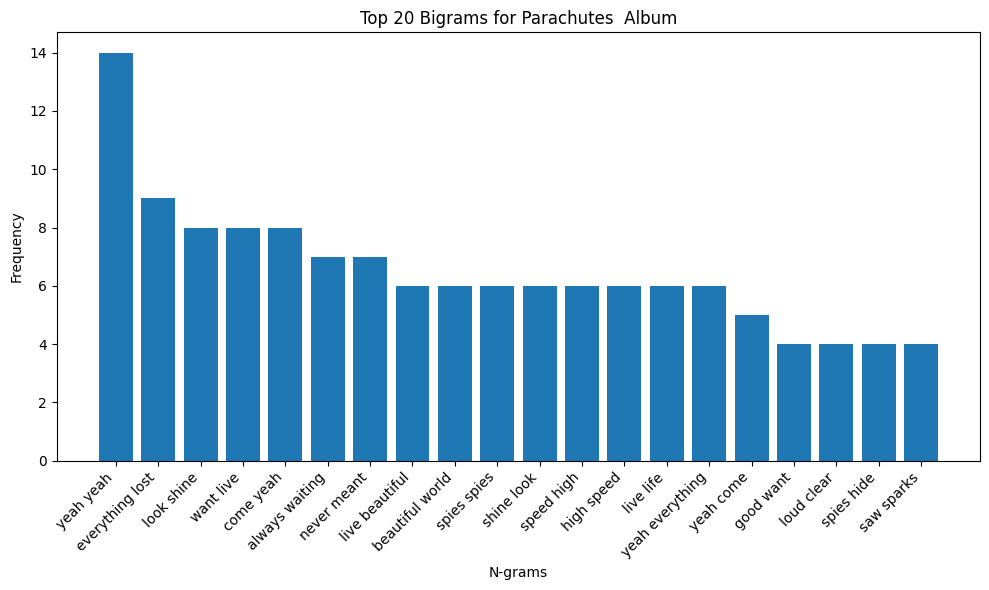

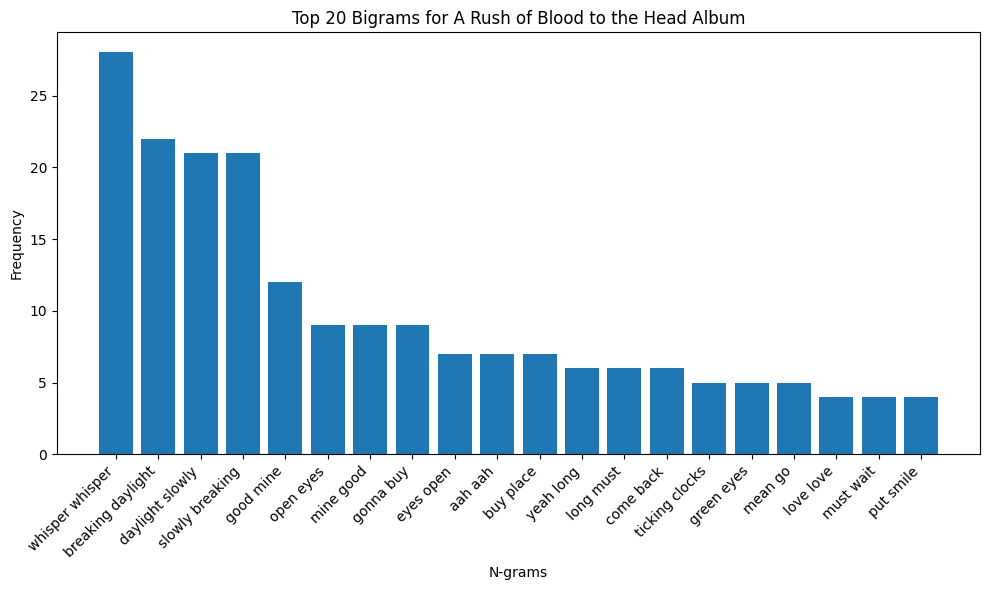

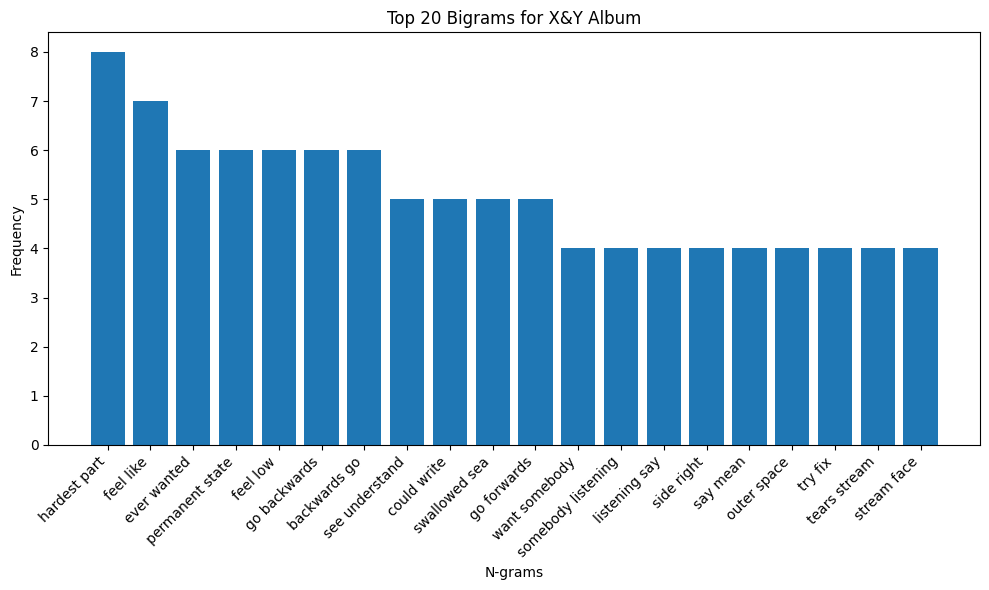

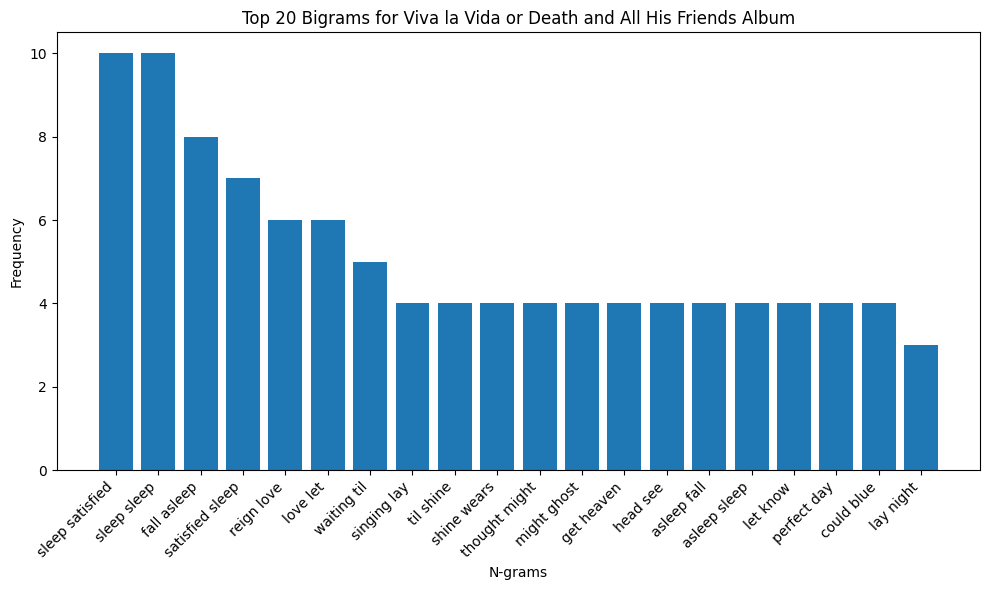

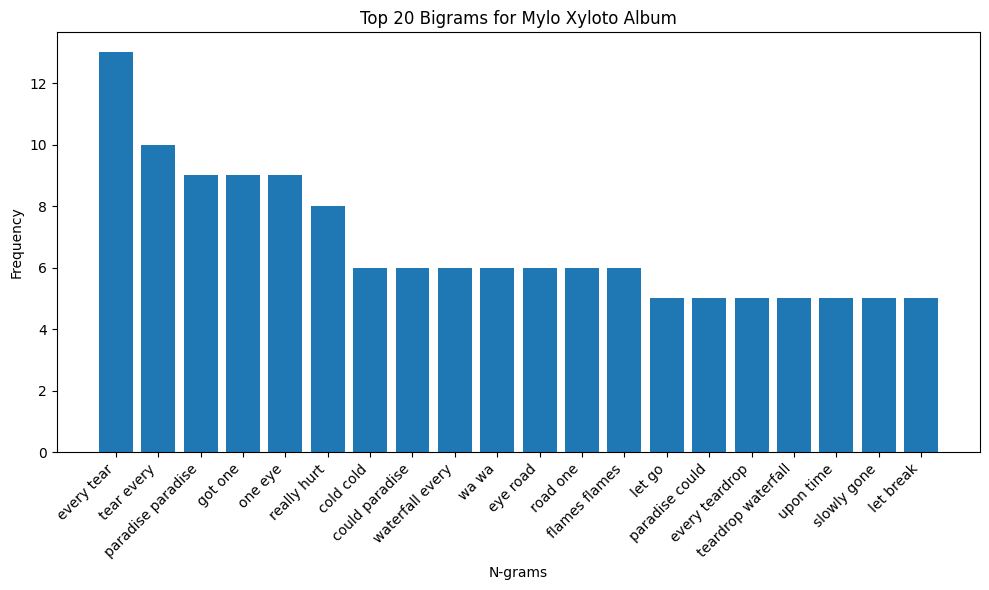

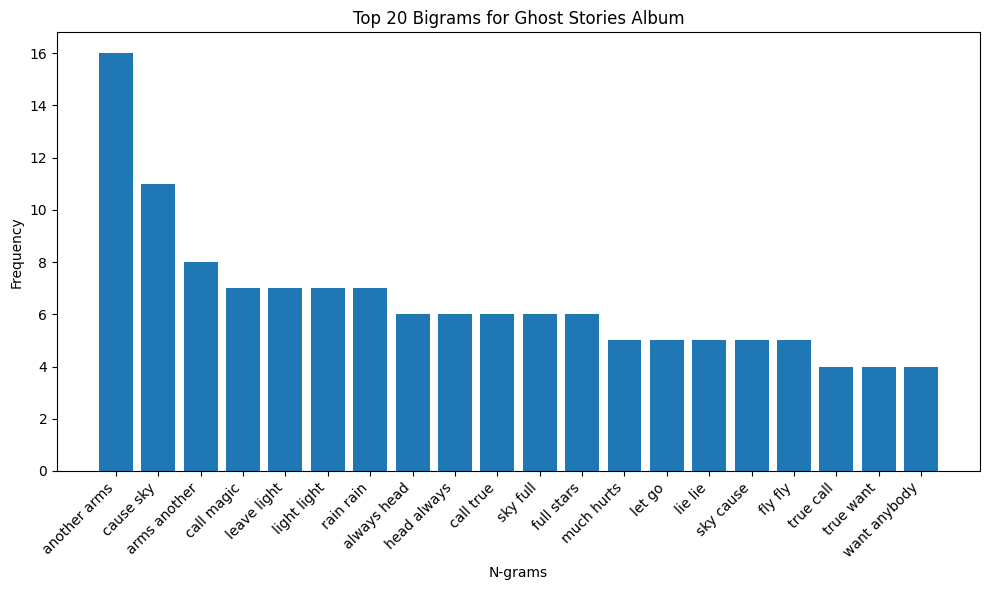

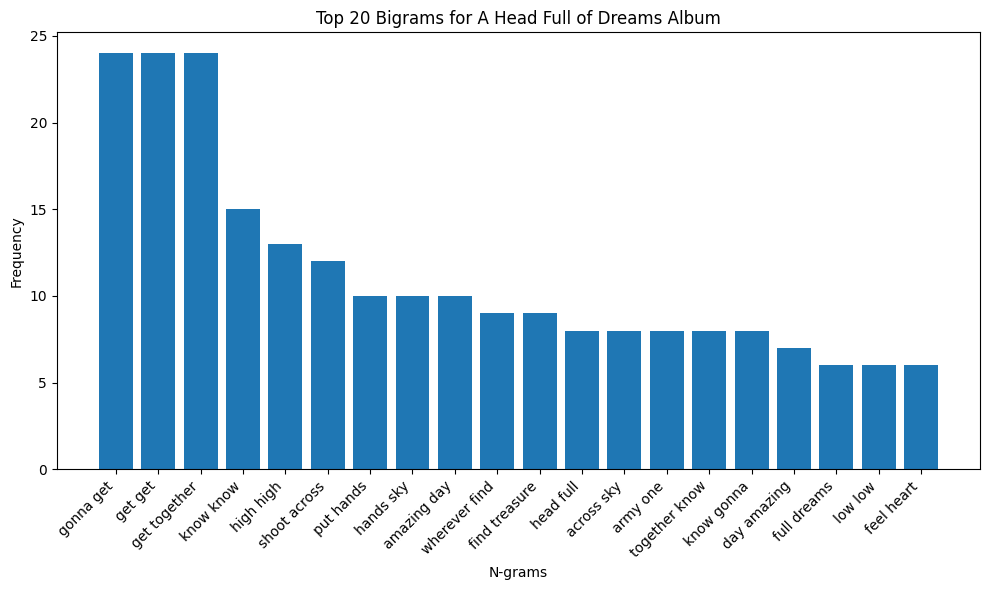

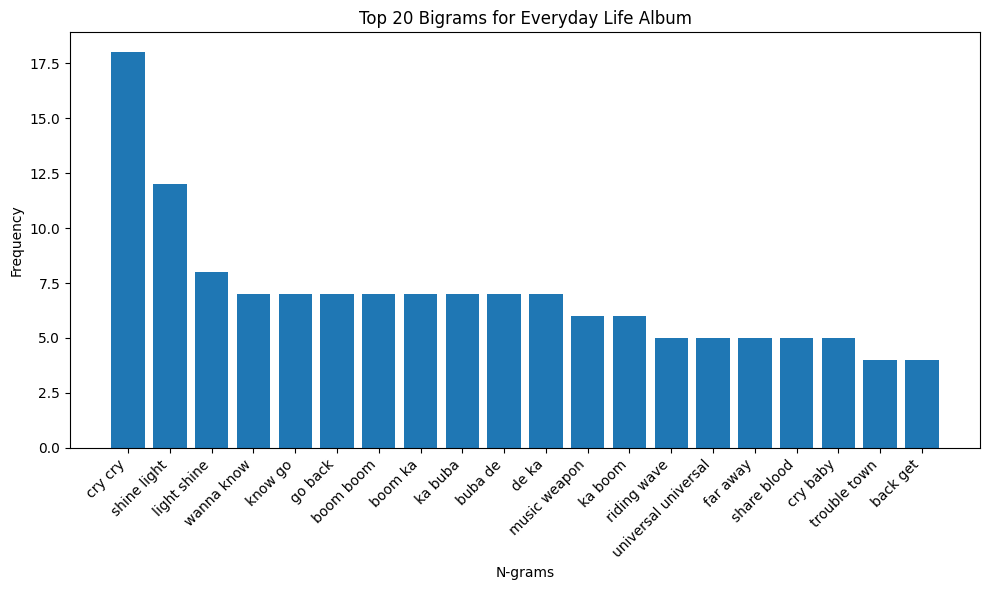

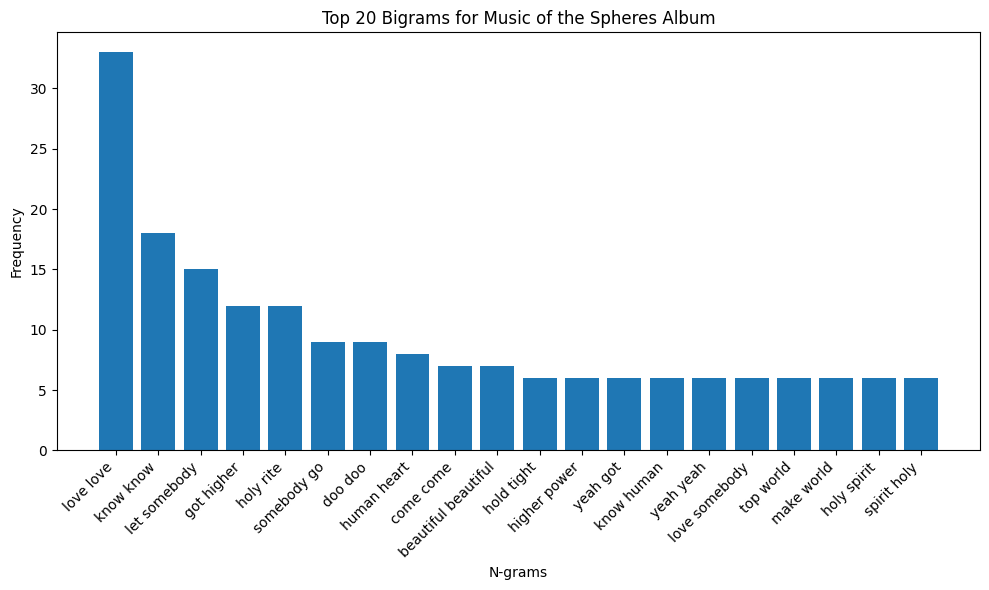

In [32]:
# Function to visualize top n-grams
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize top bigrams for each album
for album, (bigrams, trigrams) in ngrams_per_album.items():
    plot_ngrams(bigrams, f'Top 20 Bigrams for {album} Album')

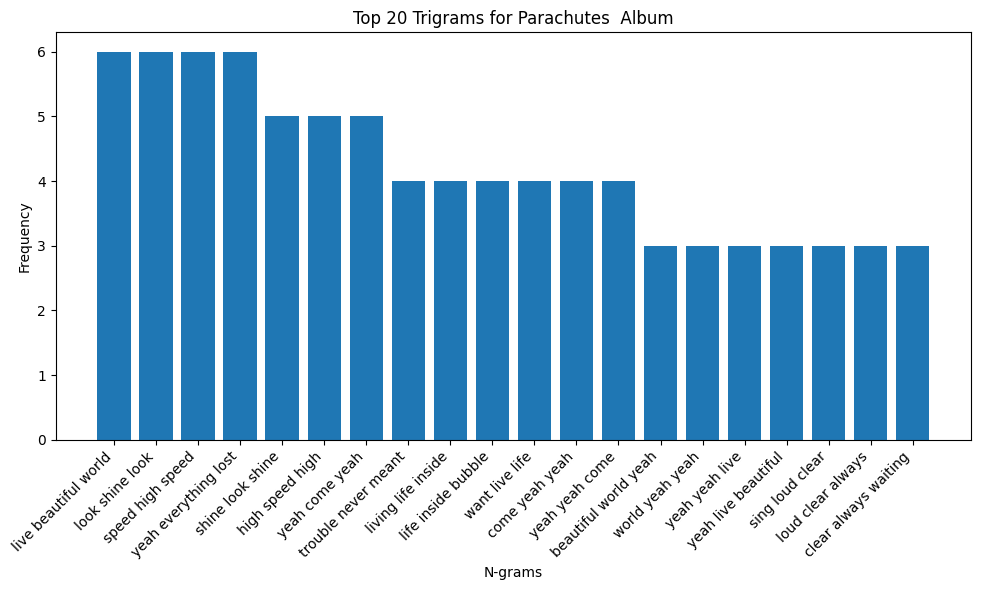

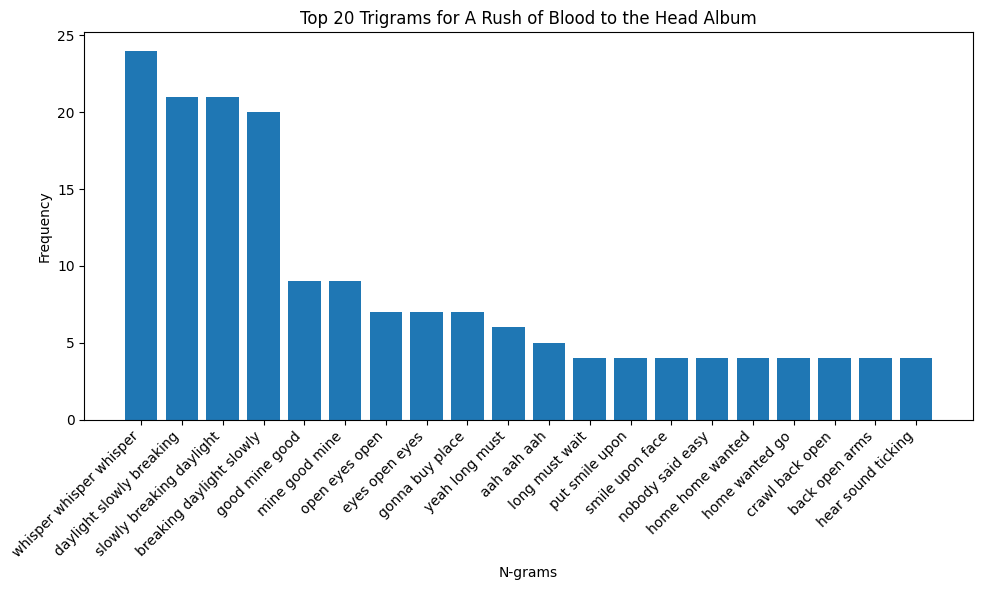

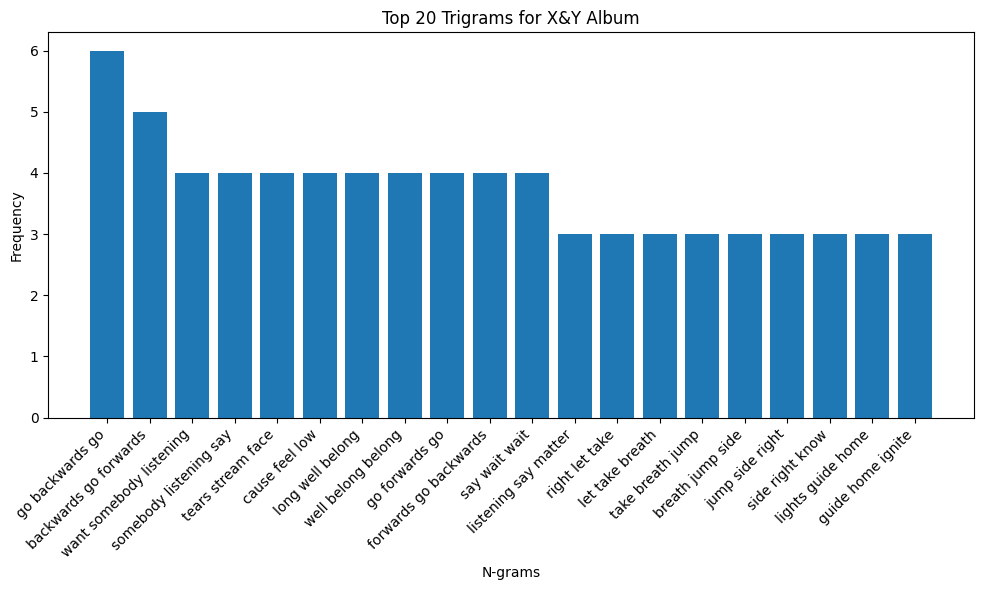

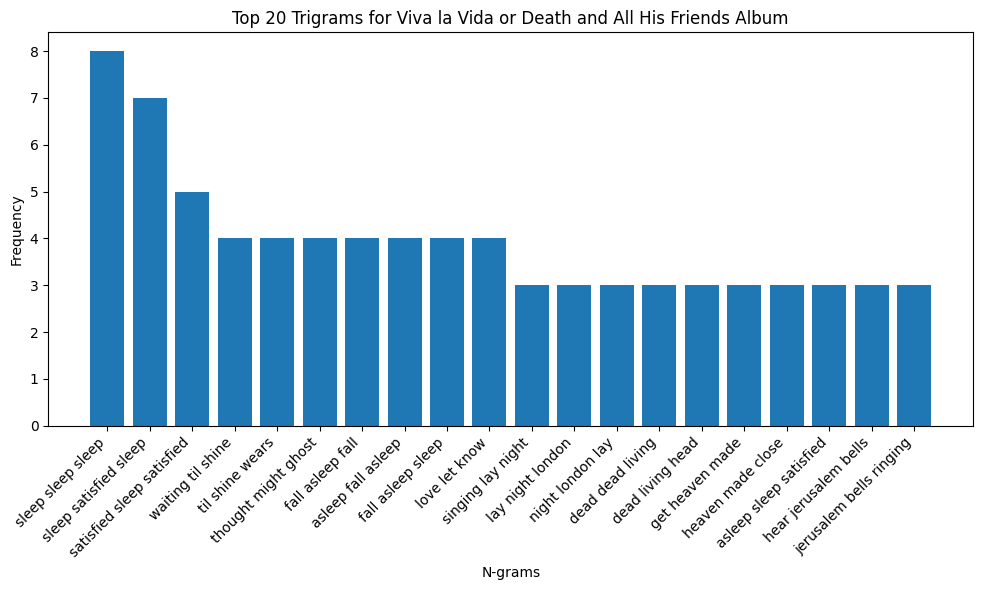

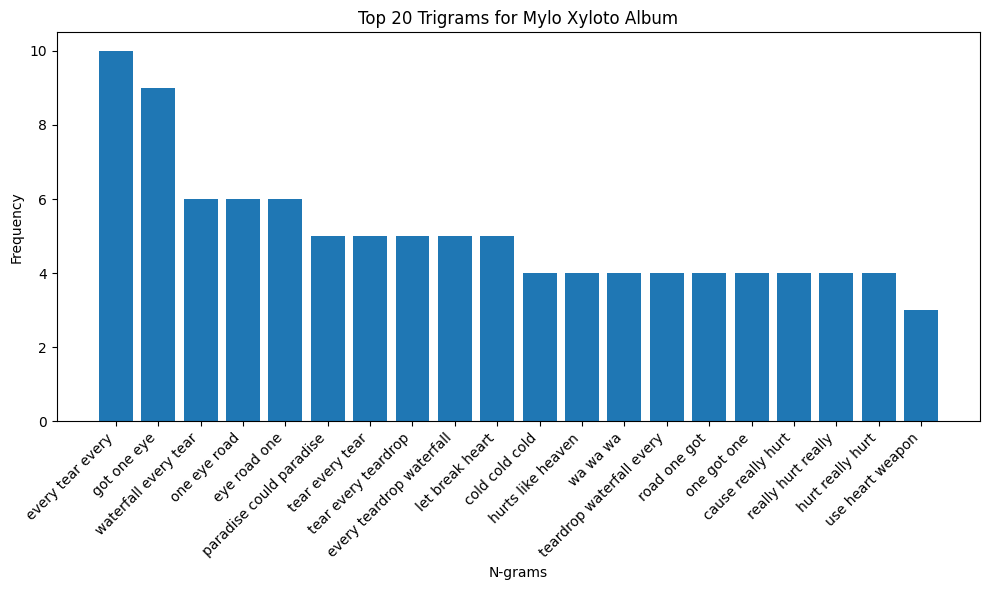

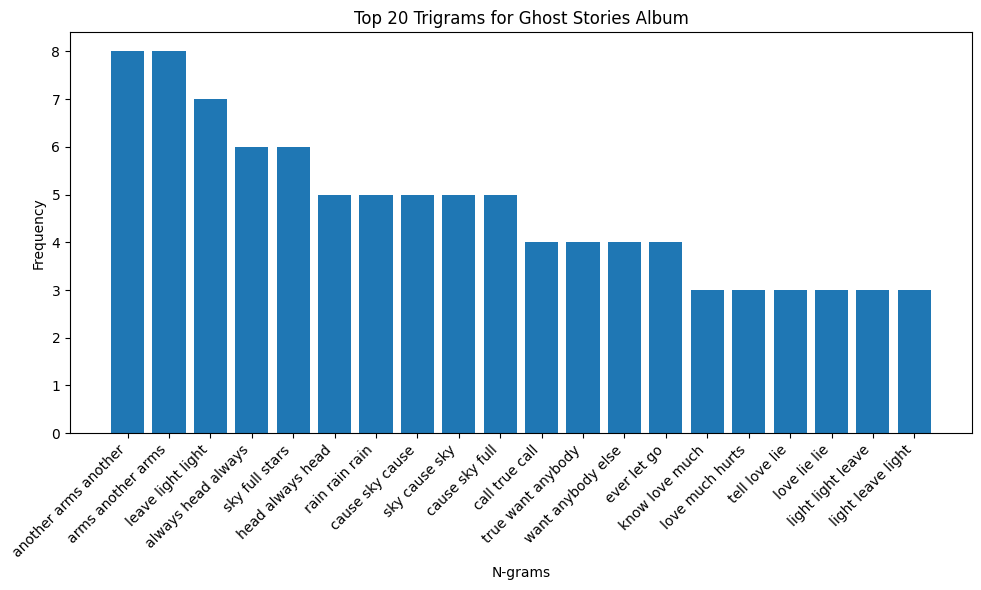

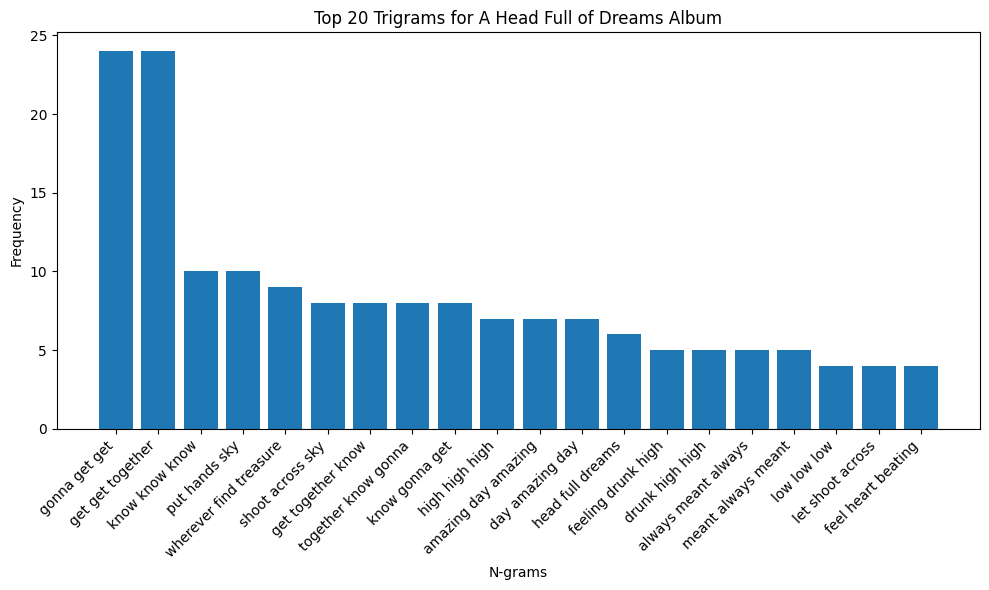

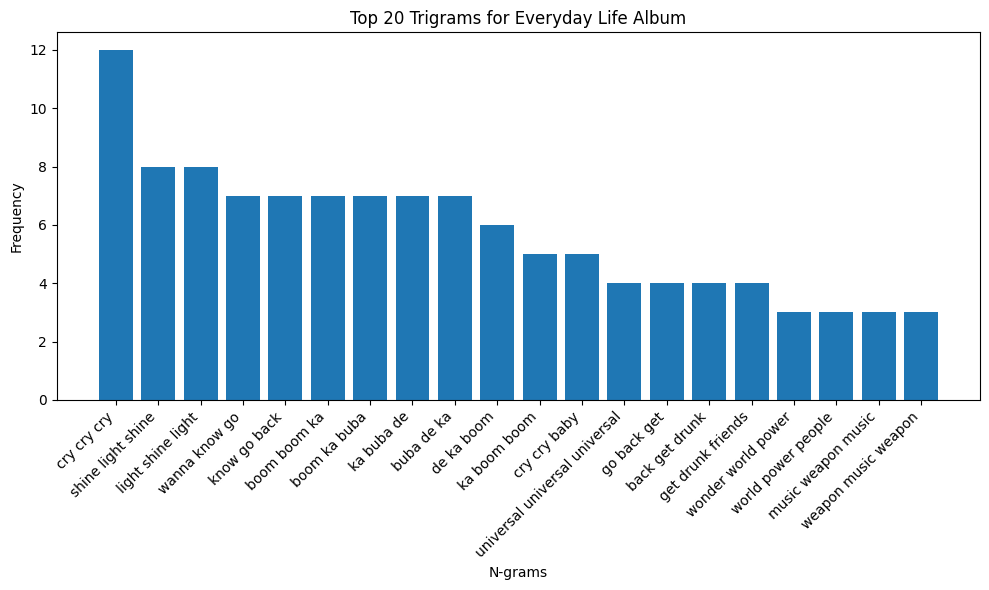

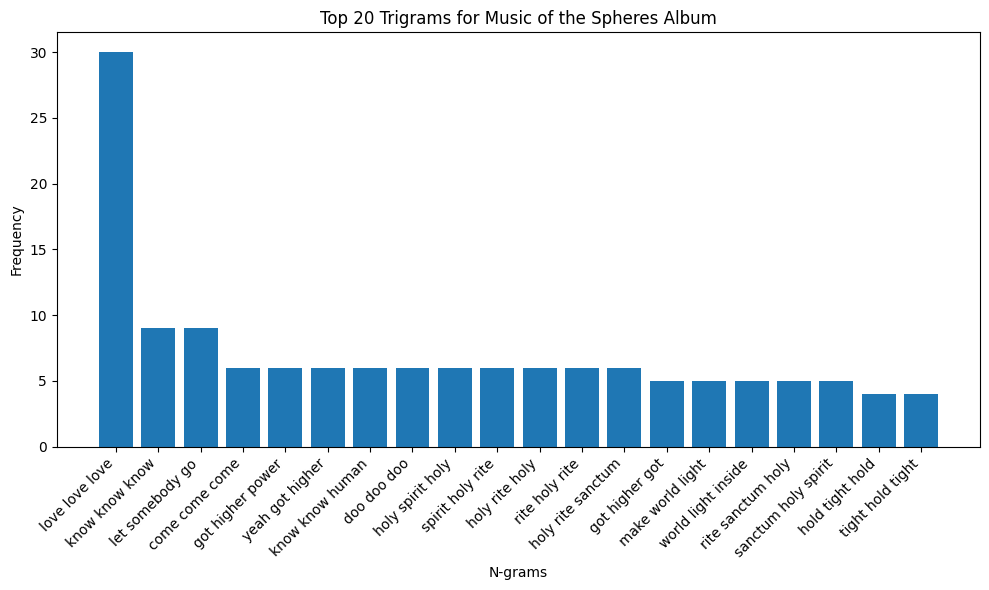

In [33]:
# Visualize top trigrams for each album
for album, (bigrams, trigrams) in ngrams_per_album.items():
    plot_ngrams(trigrams, f'Top 20 Trigrams for {album} Album')


## 4.3 TF-IDF Analysis

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned lyrics
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed Lyrics'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the TF-IDF DataFrame
print(tfidf_df.head())

   aah  able  accept  ache    across  admit  adventure  advertise  africa  \
0  0.0   0.0     0.0   0.0  0.000000    0.0        0.0        0.0     0.0   
1  0.0   0.0     0.0   0.0  0.000000    0.0        0.0        0.0     0.0   
2  0.0   0.0     0.0   0.0  0.000000    0.0        0.0        0.0     0.0   
3  0.0   0.0     0.0   0.0  0.000000    0.0        0.0        0.0     0.0   
4  0.0   0.0     0.0   0.0  0.140191    0.0        0.0        0.0     0.0   

   aim  ...  written     wrong    wrote   ya      yeah  year  yellow      yes  \
0  0.0  ...      0.0  0.000000  0.00000  0.0  0.346270   0.0   0.000  0.00000   
1  0.0  ...      0.0  0.000000  0.00000  0.0  0.096664   0.0   0.000  0.00000   
2  0.0  ...      0.0  0.000000  0.00000  0.0  0.000000   0.0   0.000  0.00000   
3  0.0  ...      0.0  0.077669  0.00000  0.0  0.479386   0.0   0.000  0.08898   
4  0.0  ...      0.0  0.000000  0.08143  0.0  0.114825   0.0   0.374  0.00000   

   young  zero  
0    0.0   0.0  
1    0.0   0.0  

In [36]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Columns: 1473 entries, aah to zero
dtypes: float64(1473)
memory usage: 1.2 MB


In [37]:
tfidf_df.shape

(106, 1473)

In [38]:
# Get the TF-IDF scores for the first document
first_document_scores = tfidf_df.iloc[0]

# Sort the scores in descending order
sorted_scores = first_document_scores.sort_values(ascending=False)

# Display the top 10 words with the highest TF-IDF scores
print(sorted_scores.head(10))


beautiful    0.492138
live         0.455659
yeah         0.346270
world        0.296803
done         0.227829
grown        0.210483
fought       0.210483
stone        0.193344
sinking      0.193344
bone         0.181184
Name: 0, dtype: float64


In [39]:
# Get the TF-IDF scores for the term 'love' across all documents
term = 'love'
if term in tfidf_df.columns:
    term_scores = tfidf_df[term]
    print(term_scores)
else:
    print(f"The term '{term}' is not in the TF-IDF DataFrame.")


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.075403
         ...   
101    0.805219
102    0.000000
103    0.021092
104    0.000000
105    0.088570
Name: love, Length: 106, dtype: float64


In [40]:
# plot tf_idf scores for top-20 terms over each song. Groupby-album.

In [41]:
# Function to extract top N keywords for each document
def extract_keywords(tfidf_df, top_n=10):
    keywords = {}
    for index, row in tfidf_df.iterrows():
        sorted_row = row.sort_values(ascending=False)
        keywords[index] = sorted_row.head(top_n).index.tolist()
    return keywords

# Extract the top 10 keywords for each document
keywords = extract_keywords(tfidf_df, top_n=10)
print(keywords)


{0: ['beautiful', 'live', 'yeah', 'world', 'done', 'grown', 'fought', 'stone', 'sinking', 'bone'], 1: ['waiting', 'always', 'shiver', 'clear', 'loud', 'see', 'moment', 'care', 'changed', 'attention'], 2: ['spy', 'hide', 'cause', 'corner', 'touch', 'feeling', 'came', 'fugitive', 'water', 'find'], 3: ['ohh', 'yeah', 'spark', 'saw', 'say', 'sing', 'know', 'drive', 'promise', 'cry'], 4: ['look', 'shine', 'yellow', 'skin', 'thing', 'drew', 'bleed', 'turn', 'bone', 'across'], 5: ['web', 'meant', 'trouble', 'never', 'spider', 'spun', 'caused', 'stupid', 'harm', 'middle'], 6: ['always', 'haze', 'round', 'stormy', 'loving', 'wait', 'line', 'take', 'time', 'reverse'], 7: ['speed', 'confidence', 'high', 'bubble', 'living', 'inside', 'head', 'life', 'explodes', 'ring'], 8: ['live', 'want', 'never', 'life', 'wooden', 'friend', 'learn', 'house', 'change', 'making'], 9: ['yeah', 'lost', 'everything', 'demon', 'sing', 'neglected', 'counting', 'come', 'hoping', 'think'], 10: ['give', 'aah', 'open', 'ey

In [42]:
#perform tfidf per album instead of per song.